In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np


In [4]:
seed = 14
np.random.seed(seed)

gas_turbine = pd.read_csv('gas_turbines.csv')
gas_turbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
gas_turbine.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
gas_turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


<Axes: >

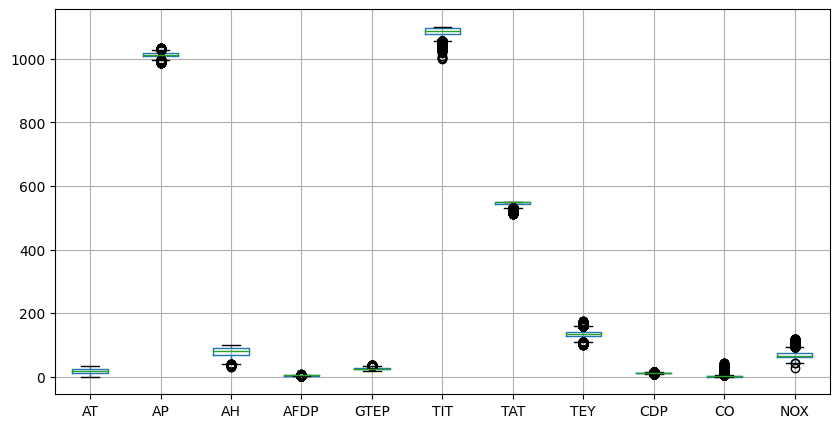

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
gas_turbine.boxplot()

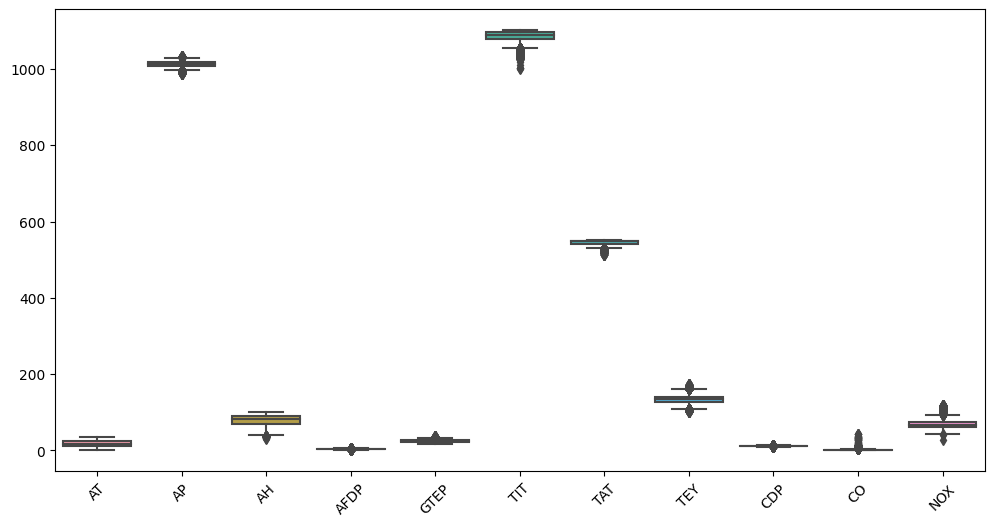

In [8]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create the box plots for all columns using seaborn
sns.boxplot(data=gas_turbine)

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the box plots
plt.show()


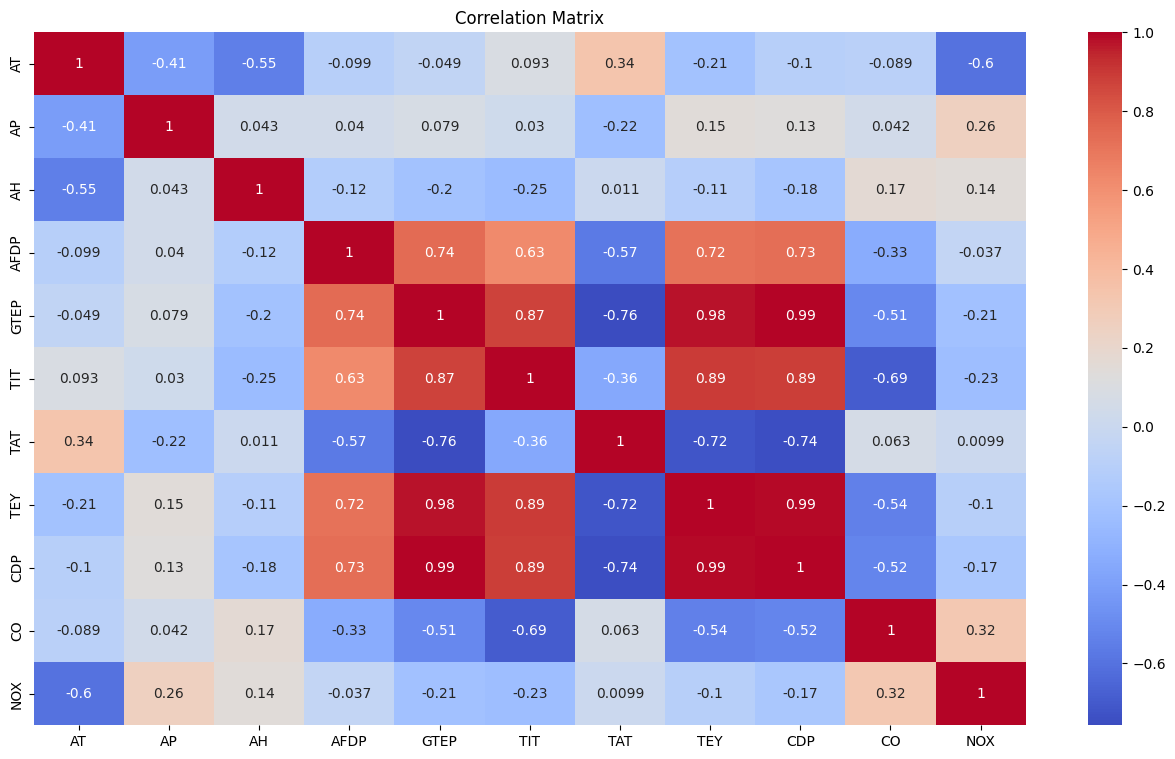

In [9]:
plt.figure(figsize =(16,9))
corr = gas_turbine.corr()
sns.heatmap(corr,cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c519388a4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c519388aa10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c519388a230>],
 'medians': [<matplotlib.lines.Line2D at 0x7c519388af50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c519388b1f0>],
 'means': []}

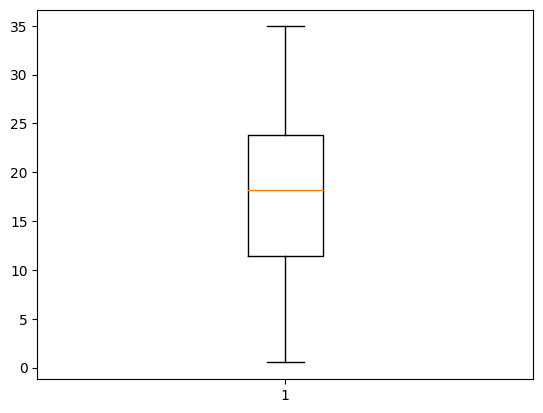

In [10]:
plt.boxplot(gas_turbine.AT)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c5193d72860>,
 'caps': [<matplotlib.lines.Line2D at 0x7c5193d72dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c5193d725c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c5193d73310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c5193d735b0>],
 'means': []}

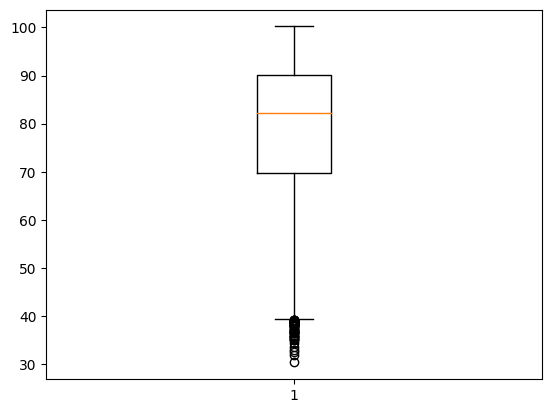

In [11]:
plt.boxplot(gas_turbine.AH)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c5193dee440>,
 'caps': [<matplotlib.lines.Line2D at 0x7c5193dee980>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c5193dee1a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c5193deeec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c5193def160>],
 'means': []}

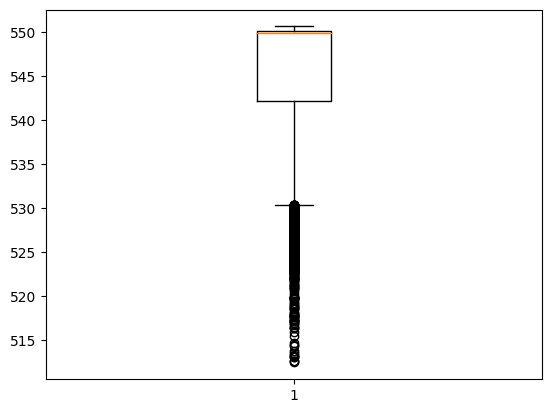

In [12]:
plt.boxplot(gas_turbine.TAT)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c5193e5e8f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c5193e5ed10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c5193e5e650>],
 'medians': [<matplotlib.lines.Line2D at 0x7c5193e5f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c5193e5f4f0>],
 'means': []}

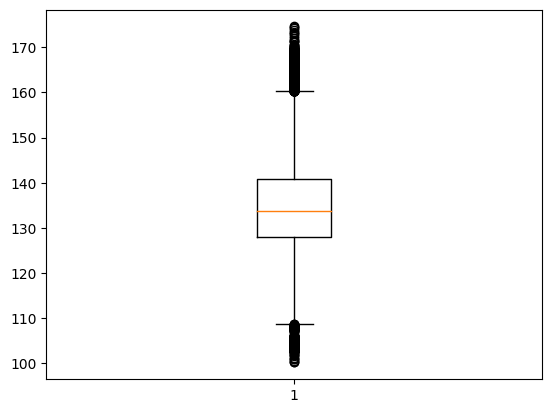

In [13]:
plt.boxplot(gas_turbine.TEY, showfliers=True)

In [14]:
import numpy as np

# Sample dataset (replace this with your own dataset)
data = gas_turbine

# Function to normalize the dataset using Min-Max scaling
def normalize_dataset(dataset):
    min_vals = np.min(dataset, axis=0)
    max_vals = np.max(dataset, axis=0)
    normalized_dataset = (dataset - min_vals) / (max_vals - min_vals)
    return normalized_dataset

# Normalize the dataset
normalized_data = normalize_dataset(gas_turbine)

print("Original dataset:")
print(gas_turbine)

print("\nNormalized dataset:")
print(normalized_data)




Original dataset:
           AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

         

In [15]:
data_no_duplicates = gas_turbine.drop_duplicates()

data_no_duplicates

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [16]:
X = gas_turbine.iloc[:,[0,1,2,3,4,5,6,9,]]
Y = gas_turbine.iloc[:,7]

In [17]:
X


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CO
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,3.1547
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,3.2363
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,3.2012
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,3.1923
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,3.2484
...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,4.5186
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,4.8470
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,7.9632
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,6.2494


In [18]:
y= gas_turbine['TEY'].apply(lambda x: 1 if x > 135 else 0)

In [19]:
 Y= pd.DataFrame(y)

In [20]:
np.unique(Y)

array([0, 1])

In [21]:
# create model
model = Sequential()
model.add(Dense(30, input_dim=8,  activation='relu')) #1st layer
model.add(Dense(20,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu'))
model.add(Dense(1, activation='sigmoid')) # output layer

In [22]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,111
Trainable params: 1,111
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X, Y, validation_split = 0.33, epochs = 150, batch_size= 20)

Epoch 1/150
504/504 [==============================] - 3s 4ms/step - loss: 0.8133 - accuracy: 0.6938 - val_loss: 0.6173 - val_accuracy: 0.7072
Epoch 2/150
504/504 [==============================] - 2s 4ms/step - loss: 0.6061 - accuracy: 0.7012 - val_loss: 0.5965 - val_accuracy: 0.7072
Epoch 3/150
504/504 [==============================] - 2s 4ms/step - loss: 0.4982 - accuracy: 0.7685 - val_loss: 0.4331 - val_accuracy: 0.7822
Epoch 4/150
504/504 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.8830 - val_loss: 0.3245 - val_accuracy: 0.8543
Epoch 5/150
504/504 [==============================] - 2s 3ms/step - loss: 0.3077 - accuracy: 0.9176 - val_loss: 0.2937 - val_accuracy: 0.9668
Epoch 6/150
504/504 [==============================] - 2s 5ms/step - loss: 0.2988 - accuracy: 0.9148 - val_loss: 0.2225 - val_accuracy: 0.9486
Epoch 7/150
504/504 [==============================] - 2s 5ms/step - loss: 0.2602 - accuracy: 0.9332 - val_loss: 0.3187 - val_accuracy: 0.8698

In [25]:
scores = model.evaluate(X, Y)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 0.1977 - accuracy: 0.9451
 accuracy: 94.51%


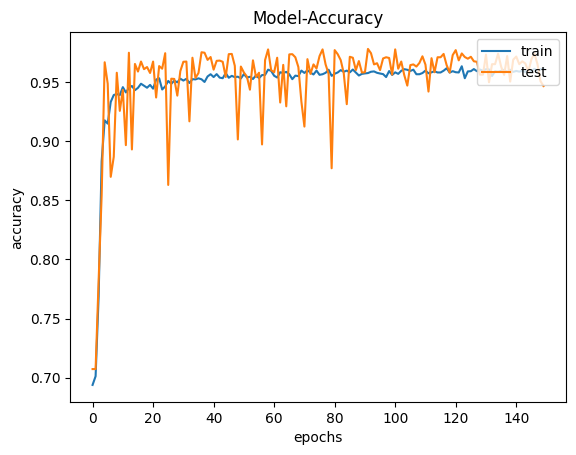

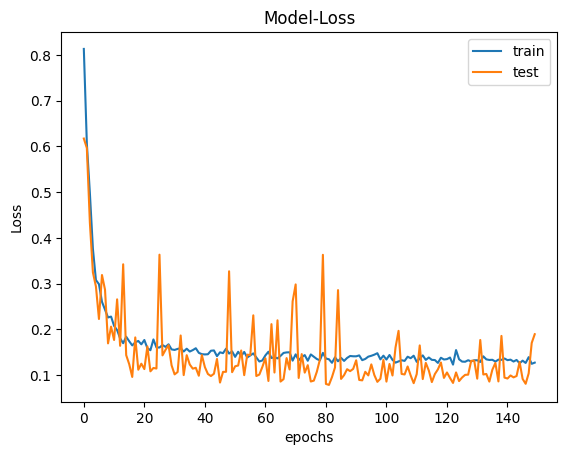

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model-Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc = 'upper right')
plt.show()


import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model-Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc = 'upper right')
plt.show()

Hyperparameter Tuning

In [27]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [28]:
# standardscaler

a = StandardScaler()
a.fit(X)
X_standard = a.transform(X)

In [29]:
X.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CO
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,1.972499
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,2.222206
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,0.000388
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,0.858055
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,1.390200
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,2.160400
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,44.103000


Batch size

epochs

In [30]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

from tensorflow.keras.optimizers import Adam

In [31]:
# create model: Function Definition
def create_model():
    model = Sequential()
    #below is the first layer
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    #Dense is a NN, 12 - no. of neurons, i/p - 8 columns, kernel_initializer=uniform - bias or weights can be taken from uniform distribution.
    #below is the second hidden layer
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    #below is the output layer
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(learning_rate=0.01) # Adam is the optimizer from stochastic Gradient descent variant, lr - learning rate - eta
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    # using binary cross entropy find accuracy of model
    return model

In [32]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0) # verbose=0 means don't print any information on screen

# Define the grid search parameters: Batch Size and epochs
batch_size = [20,40] # out of these 3 which is best value that we need to find using accuracy

# model will be built using 10 batch size once, then 20, then 40
epochs = [10,50,100] # makes all combinations all batch size and epochs

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10) # by default it takes 5 K folds, verbose =10: displays 10 lines of epochs 1/12 for 10 times
grid_result = grid.fit(X,Y)
# batch size=3, epoch=4. 3*4=12, 12*5 folds = 60 models will be built

<ipython-input-32-ebfb4e2731e2>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0) # verbose=0 means don't print any information on screen


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=20, epochs=10....................................
[CV 1/5; 1/6] END .....batch_size=20, epochs=10;, score=0.627 total time=  11.9s
[CV 2/5; 1/6] START batch_size=20, epochs=10....................................
[CV 2/5; 1/6] END .....batch_size=20, epochs=10;, score=0.874 total time=  11.2s
[CV 3/5; 1/6] START batch_size=20, epochs=10....................................
[CV 3/5; 1/6] END .....batch_size=20, epochs=10;, score=0.653 total time=  12.0s
[CV 4/5; 1/6] START batch_size=20, epochs=10....................................
[CV 4/5; 1/6] END .....batch_size=20, epochs=10;, score=0.644 total time=  11.6s
[CV 5/5; 1/6] START batch_size=20, epochs=10....................................
[CV 5/5; 1/6] END .....batch_size=20, epochs=10;, score=0.719 total time=  11.6s
[CV 1/5; 2/6] START batch_size=20, epochs=50....................................
[CV 1/5; 2/6] END .....batch_size=20, epochs=50;,

In [33]:
# lets see which combination gives best results

print('BEST: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{} , {} with: {}'.format(mean, stdev, param))


BEST: 0.9167366623878479, using {'batch_size': 40, 'epochs': 100}
0.7031728386878967 , 0.09087267542626756 with: {'batch_size': 20, 'epochs': 10}
0.7031728386878967 , 0.09087267542626756 with: {'batch_size': 20, 'epochs': 50}
0.7707925200462341 , 0.13598984995009364 with: {'batch_size': 20, 'epochs': 100}
0.8310983657836915 , 0.13399532549417492 with: {'batch_size': 40, 'epochs': 10}
0.7648240327835083 , 0.15194384845320374 with: {'batch_size': 40, 'epochs': 50}
0.9167366623878479 , 0.09923126774943986 with: {'batch_size': 40, 'epochs': 100}


Tunning of hyperparameter

In [42]:
from keras.backend import dropout
from keras.layers import Dropout

def create_model(learning_rate, dropout_rate):
  model = Sequential()
  model.add(Dense(8,input_dim = 8, kernel_initializer = 'normal', activation = 'relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(12,input_dim = 8, kernel_initializer = 'normal', activation= 'relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation= 'sigmoid'))

  adam = Adam(learning_rate = learning_rate)
  model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

#create model
model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 40, epochs = 50)

#define the grid search
learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

#make dictionary
param_grids = dict(learning_rate = learning_rate, dropout_rate = dropout_rate)

#build and fit gridsearch

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10)
grid_result = grid.fit(X,Y)

<ipython-input-42-3b6fa5888a44>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 40, epochs = 50)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.971 total time=  24.1s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.947 total time=  42.0s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.961 total time=  42.1s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.977 total time=  42.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.946 total time=  43.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [43]:
# summarize the  best results

print('BEST: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{} , {} with: {}'.format(mean, stdev, param))

BEST: 0.9606347441673279, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9606347441673279 , 0.012564341973637632 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7692632675170898 , 0.1336319008424213 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7031728386878967 , 0.09087267542626756 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9603030323982239 , 0.008865600368130786 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7031728386878967 , 0.09087267542626756 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7031728386878967 , 0.09087267542626756 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8912200689315796 , 0.12428292250331857 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7031728386878967 , 0.09087267542626756 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7031728386878967 , 0.09087267542626756 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Tunning of hyperparameter

In [45]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(12,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model


# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear'] # find which activation function is best out of these
init = ['uniform','normal','zero'] # Weight initializers from where the weights has to be sampled randomly. Uniform distribution, normal distribution and zero distribution

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X, Y)

<ipython-input-45-d80f830f3054>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.627 total time=  45.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.874 total time=  42.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.653 total time=  29.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.644 total time=  27.1s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.719 total time=  27.1s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [46]:
# summarize the  best results

print('BEST: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{} , {} with: {}'.format(mean, stdev, param))

BEST: 0.9601698517799377, using {'activation_function': 'linear', 'init': 'uniform'}
0.7031728386878967 , 0.09087267542626756 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7031728386878967 , 0.09087267542626756 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7031728386878967 , 0.09087267542626756 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7630132675170899 , 0.1285609640510987 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8295851826667786 , 0.14859877372749766 with: {'activation_function': 'relu', 'init': 'normal'}
0.7031728386878967 , 0.09087267542626756 with: {'activation_function': 'relu', 'init': 'zero'}
0.7031728386878967 , 0.09087267542626756 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7031728386878967 , 0.09087267542626756 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7031728386878967 , 0.09087267542626756 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9601698517799377 , 0.01531737430883

In [51]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 8,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

# Define the grid search parameters

neuron1 = [4,8,16]# in first hidden layer use 4,8,16 neurons
neuron2 = [2,4,8]# in second hidden layer use 2,4,8 neurons

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X, Y)

<ipython-input-51-9af735f9da10>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.627 total time=  26.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.874 total time=  26.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.653 total time=  28.9s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.644 total time=  27.2s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.719 total time=  27.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [50]:
# summarize the  best results

print('BEST: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{} , {} with: {}'.format(mean, stdev, param))

BEST: 0.7186648607254028, using {'neuron1': 8, 'neuron2': 8}
0.7031728386878967 , 0.09087267542626756 with: {'neuron1': 4, 'neuron2': 2}
0.7031728386878967 , 0.09087267542626756 with: {'neuron1': 4, 'neuron2': 4}
0.7031728386878967 , 0.09087267542626756 with: {'neuron1': 4, 'neuron2': 8}
0.7031728386878967 , 0.09087267542626756 with: {'neuron1': 8, 'neuron2': 2}
0.7124813437461853 , 0.10852920198973344 with: {'neuron1': 8, 'neuron2': 4}
0.7186648607254028 , 0.1204182399607275 with: {'neuron1': 8, 'neuron2': 8}
0.7031728386878967 , 0.09087267542626756 with: {'neuron1': 16, 'neuron2': 2}
0.7031728386878967 , 0.09087267542626756 with: {'neuron1': 16, 'neuron2': 4}
0.7031728386878967 , 0.09087267542626756 with: {'neuron1': 16, 'neuron2': 8}


Training model with optimium values

In [52]:
#skip this
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

# Fitting the model

model.fit(X, Y)

# Predicting using trained model

y_predict = model.predict(X)

# Printing the metrics
print(accuracy_score(y,y_predict))

<ipython-input-52-215d524e72fc>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


470/470 [==============================] - 1s 1ms/step
0.7031717534410533


Hyperparameters all at once

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X, Y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

<ipython-input-53-2f7dca912354>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.627 total time=  42.8s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.874 total time=  22.2s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, lear